# Nesse capítulo, vou explorar alguns métodos de seleção de variáveis univariados em regressão e classificação:
## Existem dois jeitos no scikit-learn de fazer essa seleção:
1. SelectKBest: Remove todas as variáveis, menos as k variáveis que possuem o maior score de algum método.
2. SelectPercentile: Remove todas as variáveis, menos um percentual de variáveis que possuem o maior score de algum método.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, SelectPercentile, r_regression, f_regression
from sklearn.feature_selection import f_classif, mutual_info_classif, mutual_info_regression

In [2]:
ansur_df = pd.read_csv("../dados/ansur_df.csv")

In [3]:
ansur_df=ansur_df.select_dtypes(include=["int"])

In [4]:
ansur_df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight
0,266,1467,337,222,1347,253,202,401,369,274,...,919,1700,501,329,933,240,440,1054,175,853
1,233,1395,326,220,1293,245,193,394,338,257,...,918,1627,432,316,870,225,371,1054,167,815
2,287,1430,341,230,1327,256,196,427,408,261,...,918,1678,472,329,964,255,411,1041,180,831
3,234,1347,310,230,1239,262,199,401,359,262,...,847,1625,461,315,857,205,399,968,176,793
4,250,1585,372,247,1478,267,224,435,356,263,...,1090,1679,467,303,868,214,379,1245,188,954


In [5]:
X=ansur_df.drop(["abdominalextensiondepthsitting"], axis=1)
y=ansur_df["abdominalextensiondepthsitting"]

In [6]:
print(X.shape)

(4082, 90)


### A função de score r_regression é usada para problemas de regressão, esse score calcula a correlção de pearson da target com cada variável. Um ponto importante aqui é apenar testar com variáveis numéricas, ou variável númerica e uma binária. Uma das grandes vantagens desse método é que muito rápido.

In [7]:
selector = SelectKBest(score_func=r_regression, k=10)

In [8]:
X_new=selector.fit_transform(X, y)

In [9]:
print(X_new.shape)

(4082, 10)


### A função de score f_regression é usada para problemas de regressão, esse score calcula o valor-p de um modelo de regressão linear. Quanto maior o valor-p, mais importante é a variável. Aqui podem utilizar tantos variáveis numéricas quanto variável dummy(binárias)

In [10]:
selector = SelectPercentile(score_func=f_regression, percentile=10)

In [11]:
X_new=selector.fit_transform(X, y)

In [12]:
print(X_new.shape)

(4082, 9)


## A função de score mutual_info_regression é usada para problemas de regressão, esse score é não negativa e mede a dependência entre duas variáveis. No caso de classificação, pelo menos uma é discreta, a outra pode ser discreta ou numérica. O cálculo para cada feature e target é:
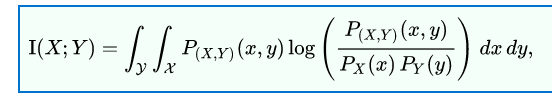
### Onde Px é a função de probabilidade marginal da feature, se for discreta, essa probabilidade é calculada pela proporção de cada valor na amostra.
### Py é a probabilidade marginal da target.
### Pxy é probabilidade conjunta de cada feature com a target

In [13]:
selector = SelectPercentile(score_func=mutual_info_regression, percentile=30)

In [14]:
X_new=selector.fit_transform(X, y)

In [15]:
print(X_new.shape)

(4082, 27)


### A função de score f_classif, é usada para problemas de classificação, esse score calcula o valor-p de um modelo de regressão logística Quanto maior o valor-p, mais importante é a variável. Aqui podem utilizar tantos variáveis numéricas quanto variável dummy(binárias)

In [16]:
ansur_df = pd.read_csv("../dados/ansur_df.csv")

In [17]:
y=ansur_df["Gender"]
y.iloc[:2000]="Female"
X=ansur_df.select_dtypes(include=["int"])

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
selector = SelectPercentile(score_func=f_classif, percentile=10)

In [19]:
X_new=selector.fit_transform(X, y)

In [20]:
print(X_new.shape)

(4082, 9)


## A função de score mutual_info_classif é usada para problemas de classificação, esse score é não negativa e mede a dependência entre duas variáveis. No caso de classificação, pelo menos uma é discreta, a outra pode ser discreta ou numérica. O cálculo para cada feature e target é:
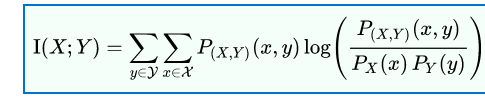
### Onde Px é a função de probabilidade marginal da feature, se for discreta, essa probabilidade é calculada pela proporção de cada valor na amostra. Se for contínuo, a variável é discretizada em barras do histograma e  probabilidade é calculada pela proporção de cada barra do histograma.
### Py é a probabilidade marginal da target, que nada mais é do que a proporção de cada valor na amostra.
### Pxy é probabilidade conjunta de cada feature com a target

In [21]:
selector = SelectPercentile(score_func=mutual_info_classif, percentile=30)

In [22]:
X_new=selector.fit_transform(X, y)

In [23]:
print(X_new.shape)

(4082, 27)
